In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv("E:/digit-recognizer/train.csv")

In [9]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Neural Network Implementation


---

### 1. **Initialization of Parameters (`init_params`)**

The parameters are initialized as follows:
- \( W_1 \in \mathbb{R}^{10 \times 784} \): Random weights for the first layer.
- \( B_1 \in \mathbb{R}^{10 \times 1} \): Bias for the first layer (initialized to zero).
- \( W_2 \in \mathbb{R}^{10 \times 10} \): Random weights for the second layer.
- \( B_2 \in \mathbb{R}^{10 \times 1} \): Bias for the second layer (initialized to zero).

---

### 2. **ReLU Activation Function (`ReLU`)**

The ReLU (Rectified Linear Unit) function is defined as:

\[
\text{ReLU}(Z) = \max(0, Z)
\]

Where \( Z \) is the input matrix.

---

### 3. **Softmax Activation Function (`softmax`)**

The softmax function for a vector \( Z \) is defined as:

\[
\text{softmax}(Z_i) = \frac{e^{Z_i}}{\sum_{j} e^{Z_j}}
\]

Where \( Z_i \) is the \( i^{th} \) element of the vector \( Z \).

---

### 4. **Forward Propagation (`forward_prop`)**

The forward propagation steps are as follows:

1. Compute the linear transformation for the first layer:
   \[
   Z_1 = W_1 \cdot X + B_1
   \]

2. Apply the ReLU activation function:
   \[
   A_1 = \text{ReLU}(Z_1)
   \]

3. Compute the linear transformation for the second layer:
   \[
   Z_2 = W_2 \cdot A_1 + B_2
   \]

4. Apply the softmax activation function:
   \[
   A_2 = \text{softmax}(Z_2)
   \]

Here:
- \( X \): Input matrix.
- \( W_1, B_1, W_2, B_2 \): Weights and biases for respective layers.
- \( A_1 \): Activation from the first layer.
- \( A_2 \): Final output probabilities.

---

### 5. **One-Hot Encoding (`one_hot_encoding`)**

The one-hot encoding function maps labels \( Y \) to binary vectors:

\[
\text{one\_hot}(Y_i) = 
\begin{cases} 
1 & \text{if } j = Y_i \\ 
0 & \text{otherwise}
\end{cases}
\]

Where \( j \) ranges over the possible classes.

---

### 6. **Derivative of ReLU (`derivative_relu`)**

The derivative of the ReLU function is:

\[
\text{ReLU}'(Z) = 
\begin{cases} 
1 & \text{if } Z > 0 \\ 
0 & \text{otherwise}
\end{cases}
\]

---

### 7. **Backward Propagation (`back_prop`)**

The backward propagation involves computing gradients:

1. Compute the gradient of the loss with respect to \( Z_2 \):
   \[
   dZ_2 = A_2 - \text{one\_hot}(Y)
   \]

2. Compute the gradients for the second layer:
   \[
   dW_2 = \frac{1}{m} dZ_2 \cdot A_1^T
   \]
   \[
   dB_2 = \frac{1}{m} \sum dZ_2
   \]

3. Compute the gradient of the loss with respect to \( Z_1 \) (using the chain rule):
   \[
   dZ_1 = W_2^T \cdot dZ_2 \circ \text{ReLU}'(Z_1)
   \]

4. Compute the gradients for the first layer:
   \[
   dW_1 = \frac{1}{m} dZ_1 \cdot X^T
   \]
   \[
   dB_1 = \frac{1}{m} \sum dZ_1
   \]

Here:
- \( m \): Number of samples.
- \( \circ \): Element-wise multiplication.

---

### 8. **Update Parameters (`update_params`)**

The weights and biases are updated using gradient descent:

\[
W_1 = W_1 - \alpha \cdot dW_1
\]
\[
B_1 = B_1 - \alpha \cdot dB_1
\]
\[
W_2 = W_2 - \alpha \cdot dW_2
\]
\[
B_2 = B_2 - \alpha \cdot dB_2
\]

Where \( \alpha \) is the learning rate.

---

### 9. **Get Predictions (`get_predictions`)**

Predictions are obtained by selecting the class with the highest probability:

\[
\text{predictions} = \arg\max(A_2, \text{axis}=0)
\]

---

### 10. **Compute Accuracy (`get_accuracy`)**

The accuracy is computed as:

\[
\text{accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Samples}}
\]

Or equivalently:

\[
\text{accuracy} = \frac{\sum (\text{predictions} = Y)}{\text{Total Number of Samples}}
\]

---

### 11. **Gradient Descent (`gradient_descent`)**

The gradient descent algorithm iteratively updates the parameters to minimize the loss function. At each iteration:

1. Perform forward propagation.
2. Compute gradients using backward propagation.
3. Update parameters.

Iteratively, for \( i \in [1, \text{iterations}] \):

\[
W_1, B_1, W_2, B_2 \rightarrow \text{Updated Parameters}
\]

---

This code should render correctly if used in a compatible Markdown viewer.
gation.
2. Compute gradients using backward propagation.
3. Update parameters.

Iteratively, for \( i \in [1, \text{iterations}] \):

\[
W_1, B_1, W_2, B_2 \rightarrow \text{Updated Parameters}
\]

---

This code should render correctly if used in a compatible Markdown viewer.
 or similar MathJax renderer is installed and enabled in Jupyter Notebook for proper LaTeX rendering.
ely, for \( i \in [1, \text{iterations}] \):

\[
W_1, B_1, W_2, B_2 \rightarrow \text{Updated Parameters}
\]

---

This code should render correctly if used in a compatible Markdown viewer.


## Loading & Splitting the Data 

In [134]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [136]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

## Initalizing the Parameters

In [138]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

## Activation Function

In [141]:
def ReLU(Z):
    return np.maximum(Z, 0)

## Softmax Function

In [143]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

## Forward Propagation

In [145]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

## One Hot Encoding

In [150]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

## Activation Function Derivative

In [148]:
def ReLU_deriv(Z):
    return Z > 0

## Backward Propagation

In [152]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

## Updating Parameters

In [120]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

## Training and Testing

In [172]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [174]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.0984, 1000)

Iteration:  0
[3 6 1 ... 1 1 5] [4 1 0 ... 2 1 7]
0.15892682926829269
Iteration:  100
[4 1 0 ... 3 1 7] [4 1 0 ... 2 1 7]
0.6524878048780488
Iteration:  200
[4 1 0 ... 3 1 7] [4 1 0 ... 2 1 7]
0.7709756097560976
Iteration:  300
[4 1 0 ... 2 1 7] [4 1 0 ... 2 1 7]
0.8097073170731708
Iteration:  400
[4 1 0 ... 2 1 7] [4 1 0 ... 2 1 7]
0.8309024390243902
Iteration:  500
[4 1 0 ... 2 1 7] [4 1 0 ... 2 1 7]
0.8446341463414634
Iteration:  600
[4 1 0 ... 2 1 7] [4 1 0 ... 2 1 7]
0.8541463414634146
Iteration:  700
[4 1 0 ... 2 1 7] [4 1 0 ... 2 1 7]
0.8625121951219512
Iteration:  800
[4 1 0 ... 2 1 7] [4 1 0 ... 2 1 7]
0.8695609756097561
Iteration:  900
[4 1 0 ... 2 1 7] [4 1 0 ... 2 1 7]
0.8757317073170732


## Predictions

In [176]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [4]
Label:  4


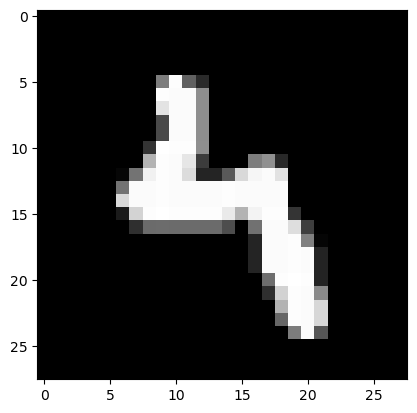

Prediction:  [1]
Label:  1


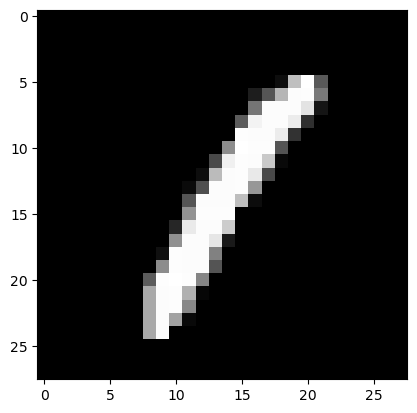

Prediction:  [0]
Label:  0


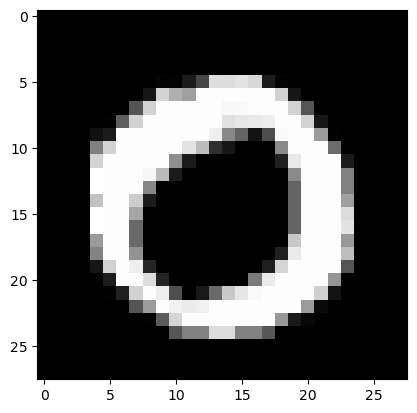

Prediction:  [0]
Label:  0


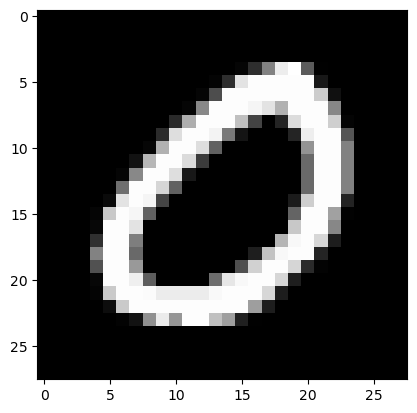

In [178]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)